In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# Load the Excel file
xlsx_dir = 'C:/Users/nuhrr/OneDrive - Stellenbosch University/Documents/1. Research Project/Data/Vols202122MorphBiolMetData27_Aug_2024.xlsx'
xlsx = pd.read_excel(xlsx_dir, usecols=['vpn', 'cd', 'cm', 'cy', 'c', 'wlm', 'left_good', 'right_good', 'dis_l', 'Centroid_size_l_wing', 'dis_R', 'Centroid_size_r_wing', 'exclude_r', 'exclude_l'])

In [5]:
# Ensure day and year is an integer
xlsx['cd'] = xlsx['cd'].astype(int)
xlsx['cy'] = xlsx['cy'].astype(int)

# Step 1: Create the 'Date' column by joining 'cd', 'cm', and 'cy' with a space, and format year as 19XX for clarity
xlsx['Date'] = xlsx['cd'].astype(str).str.zfill(2) + ' ' + xlsx['cm'] + ' ' + ('19' + xlsx['cy'].astype(str))

# Step 2: Drop 'cd', 'cm', and 'cy' columns
xlsx = xlsx.drop(columns=['cd', 'cm', 'cy'])

# Step 3: Rename 'Centroid_size_l_wing' and 'Centroid_size_r_wing' columns
xlsx = xlsx.rename(columns={
    'Centroid_size_l_wing': 'centroid_l',
    'Centroid_size_r_wing': 'centroid_r',
    'dis_R': 'dis_r'
})

In [6]:
# Move column 'Date' between '1' and '2'
col = xlsx.pop('Date')
xlsx.insert(1, 'Date', col)
xlsx['Date'] = pd.to_datetime(xlsx['Date'], format='%d %B %Y')

# Apply the condition and multiplication
xlsx.loc[xlsx['vpn'].astype(str).str.startswith('22'), 'wlm'] *= 100

In [7]:
xlsx

,vpn,Date,c,wlm,left_good,right_good,dis_l,centroid_l,dis_r,centroid_r,exclude_r,exclude_l
0,20000101,1994-11-04,1.0,732.000000,0,0,1037.957322,1312.318848,1039.492698,1313.265806,NaN,NaN
1,20000102,1994-11-04,5.0,732.000000,0,0,1050.851960,1326.152494,1052.572986,1326.425493,NaN,NaN
2,20000103,1994-11-04,5.0,723.000000,0,0,1019.754228,1286.170695,1015.082370,1285.939387,NaN,NaN
3,20000104,1994-11-04,4.0,732.000000,0,0,1047.866079,1317.680186,1028.499505,1304.490029,NaN,NaN
4,20000105,1994-11-04,7.0,713.000000,0,0,1024.401362,1294.069046,1013.314764,1282.049335,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22046,22115516,1997-02-24,NaN,694.000006,0,1,992.393949,1430.592091,990.340681,1246.443884,NaN,NaN
22047,22115517,1997-02-24,NaN,694.000006,0,0,1004.232405,1272.295267,993.652461,1256.474844,NaN,NaN
22048,22115518,1997-02-24,NaN,684.000015,0,0,997.473612,1497.926022,991.759396,1251.547038,NaN,NaN
22049,22115519,1997-02-24,6.0,675.000000,0,0,981.341316,1323.538100,966.412864,1226.966620,NaN,NaN


In [8]:
xlsx.columns

Index(['vpn', 'Date', 'c', 'wlm', 'left_good', 'right_good', 'dis_l',
       'centroid_l', 'dis_r', 'centroid_r', 'exclude_r', 'exclude_l'],
      dtype='object')

In [9]:
# Filter the data where right_good = 0 (only complete right wings) and exclude_r = NaN (removes exclusions)
filtered_r_xlsx = xlsx[(xlsx['exclude_r'].isnull()) & (xlsx['right_good'] == 0)]
#Filters: - for only complete right wings, 
#         - where dis-r values are NOT missing, 
#         - where the hatchet cell was NOT used, and 
#         - where there were less than 9 landmarks missing in the wings

In [10]:
filtered_r_xlsx

,vpn,Date,c,wlm,left_good,right_good,dis_l,centroid_l,dis_r,centroid_r,exclude_r,exclude_l
0,20000101,1994-11-04,1.0,732.000000,0,0,1037.957322,1312.318848,1039.492698,1313.265806,NaN,NaN
1,20000102,1994-11-04,5.0,732.000000,0,0,1050.851960,1326.152494,1052.572986,1326.425493,NaN,NaN
2,20000103,1994-11-04,5.0,723.000000,0,0,1019.754228,1286.170695,1015.082370,1285.939387,NaN,NaN
3,20000104,1994-11-04,4.0,732.000000,0,0,1047.866079,1317.680186,1028.499505,1304.490029,NaN,NaN
4,20000105,1994-11-04,7.0,713.000000,0,0,1024.401362,1294.069046,1013.314764,1282.049335,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22045,22115515,1997-02-24,1.0,617.000008,0,0,901.975373,1223.620081,891.099358,1113.213960,NaN,NaN
22047,22115517,1997-02-24,NaN,694.000006,0,0,1004.232405,1272.295267,993.652461,1256.474844,NaN,NaN
22048,22115518,1997-02-24,NaN,684.000015,0,0,997.473612,1497.926022,991.759396,1251.547038,NaN,NaN
22049,22115519,1997-02-24,6.0,675.000000,0,0,981.341316,1323.538100,966.412864,1226.966620,NaN,NaN


In [11]:
filtered_r_xlsx.loc[filtered_r_xlsx.vpn==20001014]

,vpn,Date,c,wlm,left_good,right_good,dis_l,centroid_l,dis_r,centroid_r,exclude_r,exclude_l


<ipython-input-12-24f32b8e02f8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_r_xlsx['outlier_r_3'] = abs(filtered_r_xlsx['dis_r']/100 - y_predicted) > outlier_threshold_3
<ipython-input-12-24f32b8e02f8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_r_xlsx['outlier_r_5'] = abs(filtered_r_xlsx['dis_r']/100 - y_predicted) > outlier_threshold_5
<ipython-input-12-24f32b8e02f8>:34: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed

Number of inliers (within 3 standard deviations): 18723
Number of outliers (outside 3 standard deviations): 588
Number of extreme outliers (outside 5 standard deviations): 118


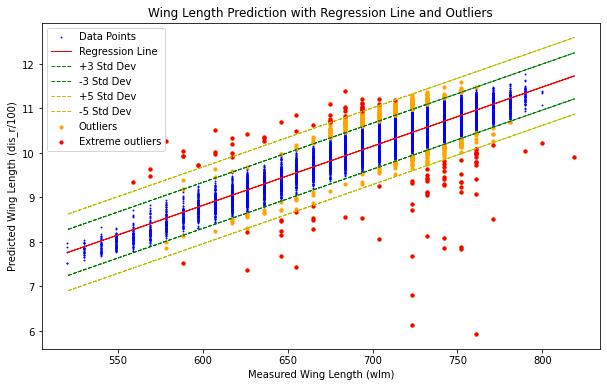

In [12]:
# Linear regression
linreg = LinearRegression()
linreg.fit(np.array(filtered_r_xlsx['wlm']).reshape((-1, 1)), filtered_r_xlsx['dis_r']/100)
y_predicted = linreg.predict(np.array(filtered_r_xlsx['wlm']).reshape((-1, 1)))

# Calculate standard error and identify outliers
std_error = np.std(abs(filtered_r_xlsx['dis_r']/100 - y_predicted))
outlier_threshold_3 = 3 * std_error
outlier_threshold_5 = 5 * std_error

# Calculate upper and lower bounds for +/- 3 standard deviations
upper_bound_3 = y_predicted + outlier_threshold_3
lower_bound_3 = y_predicted - outlier_threshold_3

# Calculate upper and lower bounds for +/- 3 standard deviations
upper_bound_5 = y_predicted + outlier_threshold_5
lower_bound_5 = y_predicted - outlier_threshold_5

# Identify outliers
filtered_r_xlsx['outlier_r_3'] = abs(filtered_r_xlsx['dis_r']/100 - y_predicted) > outlier_threshold_3
filtered_r_xlsx['outlier_r_5'] = abs(filtered_r_xlsx['dis_r']/100 - y_predicted) > outlier_threshold_5

# Count the number of outliers and extreme outliers
num_outliers_3 = filtered_r_xlsx['outlier_r_3'].sum()
num_outliers_5 = filtered_r_xlsx['outlier_r_5'].sum()

# Print the results
print(f"Number of inliers (within 3 standard deviations): {len(filtered_r_xlsx)-num_outliers_3}")
print(f"Number of outliers (outside 3 standard deviations): {num_outliers_3}")
print(f"Number of extreme outliers (outside 5 standard deviations): {num_outliers_5}")

# Save the updated dataframe to a new Excel file
output_path = 'C:/Users/nuhrr/OneDrive - Stellenbosch University/Documents/1. Research Project/Data/Vols202122MorphBiolMetData_with_outliers3.xlsx'
filtered_r_xlsx.to_excel(output_path, index=False)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(filtered_r_xlsx['wlm'], filtered_r_xlsx['dis_r']/100, color='b', s=0.8, label='Data Points')

# Plot the regression line
plt.plot(filtered_r_xlsx['wlm'], y_predicted, color='r', linewidth=1, label='Regression Line')

# Plot the upper and lower bounds for +/- 3 standard deviations
plt.plot(filtered_r_xlsx['wlm'], upper_bound_3, color='g', linestyle='--', linewidth=1, label='+3 Std Dev')
plt.plot(filtered_r_xlsx['wlm'], lower_bound_3, color='g', linestyle='--', linewidth=1, label='-3 Std Dev')

# Plot the upper and lower bounds for +/- 5 standard deviations
plt.plot(filtered_r_xlsx['wlm'], upper_bound_5, color='y', linestyle='--', linewidth=1, label='+5 Std Dev')
plt.plot(filtered_r_xlsx['wlm'], lower_bound_5, color='y', linestyle='--', linewidth=1, label='-5 Std Dev')

# Highlight the outliers
outliers_3 = filtered_r_xlsx[filtered_r_xlsx['outlier_r_3']]
outliers_5 = filtered_r_xlsx[filtered_r_xlsx['outlier_r_5']]
plt.scatter(outliers_3['wlm'], outliers_3['dis_r']/100, color='orange', s=10, label='Outliers')
plt.scatter(outliers_5['wlm'], outliers_5['dis_r']/100, color='red', s=10, label='Extreme outliers')

# Labels and legend
plt.xlabel("Measured Wing Length (wlm)")
plt.ylabel("Predicted Wing Length (dis_r/100)")
plt.legend()
plt.title("Wing Length Prediction with Regression Line and Outliers")
plt.show()

In [13]:
filtered_r_xlsx

,vpn,Date,c,wlm,left_good,right_good,dis_l,centroid_l,dis_r,centroid_r,exclude_r,exclude_l,outlier_r_3,outlier_r_5
0,20000101,1994-11-04,1.0,732.000000,0,0,1037.957322,1312.318848,1039.492698,1313.265806,NaN,NaN,False,False
1,20000102,1994-11-04,5.0,732.000000,0,0,1050.851960,1326.152494,1052.572986,1326.425493,NaN,NaN,False,False
2,20000103,1994-11-04,5.0,723.000000,0,0,1019.754228,1286.170695,1015.082370,1285.939387,NaN,NaN,False,False
3,20000104,1994-11-04,4.0,732.000000,0,0,1047.866079,1317.680186,1028.499505,1304.490029,NaN,NaN,False,False
4,20000105,1994-11-04,7.0,713.000000,0,0,1024.401362,1294.069046,1013.314764,1282.049335,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22045,22115515,1997-02-24,1.0,617.000008,0,0,901.975373,1223.620081,891.099358,1113.213960,NaN,NaN,False,False
22047,22115517,1997-02-24,NaN,694.000006,0,0,1004.232405,1272.295267,993.652461,1256.474844,NaN,NaN,False,False
22048,22115518,1997-02-24,NaN,684.000015,0,0,997.473612,1497.926022,991.759396,1251.547038,NaN,NaN,False,False
22049,22115519,1997-02-24,6.0,675.000000,0,0,981.341316,1323.538100,966.412864,1226.966620,NaN,NaN,False,False


In [14]:
filtered_r_xlsx.columns

Index(['vpn', 'Date', 'c', 'wlm', 'left_good', 'right_good', 'dis_l',
       'centroid_l', 'dis_r', 'centroid_r', 'exclude_r', 'exclude_l',
       'outlier_r_3', 'outlier_r_5'],
      dtype='object')

In [15]:
# Filter the data where right_good = 0 (only complete right wings), outlier_r_3 = False (exclude outliers) and exclude_r = NaN (removes exclusions)
df = filtered_r_xlsx[filtered_r_xlsx['outlier_r_3'] == False]
df

,vpn,Date,c,wlm,left_good,right_good,dis_l,centroid_l,dis_r,centroid_r,exclude_r,exclude_l,outlier_r_3,outlier_r_5
0,20000101,1994-11-04,1.0,732.000000,0,0,1037.957322,1312.318848,1039.492698,1313.265806,NaN,NaN,False,False
1,20000102,1994-11-04,5.0,732.000000,0,0,1050.851960,1326.152494,1052.572986,1326.425493,NaN,NaN,False,False
2,20000103,1994-11-04,5.0,723.000000,0,0,1019.754228,1286.170695,1015.082370,1285.939387,NaN,NaN,False,False
3,20000104,1994-11-04,4.0,732.000000,0,0,1047.866079,1317.680186,1028.499505,1304.490029,NaN,NaN,False,False
4,20000105,1994-11-04,7.0,713.000000,0,0,1024.401362,1294.069046,1013.314764,1282.049335,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22045,22115515,1997-02-24,1.0,617.000008,0,0,901.975373,1223.620081,891.099358,1113.213960,NaN,NaN,False,False
22047,22115517,1997-02-24,NaN,694.000006,0,0,1004.232405,1272.295267,993.652461,1256.474844,NaN,NaN,False,False
22048,22115518,1997-02-24,NaN,684.000015,0,0,997.473612,1497.926022,991.759396,1251.547038,NaN,NaN,False,False
22049,22115519,1997-02-24,6.0,675.000000,0,0,981.341316,1323.538100,966.412864,1226.966620,NaN,NaN,False,False


In [16]:
df.columns

Index(['vpn', 'Date', 'c', 'wlm', 'left_good', 'right_good', 'dis_l',
       'centroid_l', 'dis_r', 'centroid_r', 'exclude_r', 'exclude_l',
       'outlier_r_3', 'outlier_r_5'],
      dtype='object')

In [17]:
df.Date.nunique()

515

In [20]:
# Load the Excel file
xlsx_dir2 = 'C:/Users/nuhrr/OneDrive - Stellenbosch University/Documents/1. Research Project/Data/Logger daily means T RH SatDef NDVI rain.xlsx'
df2 = pd.read_excel(xlsx_dir2)

In [21]:
df2

,Date,tbar,tmax,avrh,minrh,avsdmB,maxsdmB,ndvi,rain
0,1991-11-17,28.293333,33.66,55.541791,34.352980,18.207599,34.262881,0.386533,0.0
1,1991-11-18,28.620417,34.84,55.747799,31.773719,18.936746,38.022599,0.390800,0.0
2,1991-11-19,27.965417,31.80,56.171642,42.782198,17.064374,26.899160,0.395067,0.0
3,1991-11-20,29.180833,36.81,52.439812,26.471460,20.859541,45.661356,0.399333,9.0
4,1991-11-21,27.006250,34.93,63.086618,33.959691,14.703096,36.988044,0.403600,68.0
...,...,...,...,...,...,...,...,...,...
2962,1999-12-27,31.162917,36.97,41.458712,26.505478,28.173900,45.416664,0.399677,0.0
2963,1999-12-28,30.677917,35.77,43.479379,31.699673,25.937595,40.066971,0.403484,0.0
2964,1999-12-29,30.660000,36.22,44.948426,30.696301,25.262775,41.671903,0.407290,0.0
2965,1999-12-30,29.692500,36.56,45.995596,29.823141,23.968852,42.989207,0.411097,0.0


In [22]:
df2.columns

Index(['Date', 'tbar', 'tmax', 'avrh', 'minrh', 'avsdmB', 'maxsdmB', 'ndvi',
       'rain'],
      dtype='object')

In [23]:
from scipy.stats import pearsonr

In [24]:
# Step 1: Create the average dis_r and standard deviation columns in df2

# Ensure Date is in the correct format
#df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')
#df2['Date'] = pd.to_datetime(df2['Date'], format='%d %B %Y')

# Calculate average dis_r and standard deviation for each date in df
dis_r_stats = df.groupby('Date')['dis_r'].agg(['mean', 'std']).rename(columns={'mean': 'dis_r', 'std': 'dis_r_std'})

# Merge dis_r_stats with df2 on the Date column
df2 = pd.merge(df2, dis_r_stats, on='Date', how='right')

In [25]:
## Now drop any duplicate columns if they exist (i.e., 'dis_r_x', 'dis_r_std_x' etc.)
#df2 = df2.drop(columns=['dis_r_x', 'dis_r_std_x'])

## Optionally, rename 'dis_r_y' and 'dis_r_std_y' back to the original names
#df2 = df2.rename(columns={'dis_r_y': 'dis_r', 'dis_r_std_y': 'dis_r_std'})

In [26]:
df2.columns

Index(['Date', 'tbar', 'tmax', 'avrh', 'minrh', 'avsdmB', 'maxsdmB', 'ndvi',
       'rain', 'dis_r', 'dis_r_std'],
      dtype='object')

In [27]:
df2

,Date,tbar,tmax,avrh,minrh,avsdmB,maxsdmB,ndvi,rain,dis_r,dis_r_std
0,1994-11-03,26.622500,34.18,59.152641,34.084898,16.666182,35.265750,0.329161,0.0,1022.338620,34.918102
1,1994-11-04,29.487500,35.63,45.056929,30.823802,24.126647,40.139057,0.330065,0.0,1026.479174,25.018656
2,1994-11-05,30.279167,35.45,37.101099,25.984661,27.977591,42.661740,0.330968,0.0,1033.000532,25.654105
3,1994-11-06,31.303750,36.20,40.494202,29.940243,28.036622,41.981983,0.331871,0.0,1021.100807,42.905958
4,1994-11-07,31.910417,36.75,37.816504,26.684400,30.452884,45.380332,0.332774,0.0,1025.607295,33.510514
...,...,...,...,...,...,...,...,...,...,...,...
510,1997-02-20,25.677500,31.34,78.669648,58.389227,7.895960,19.058472,0.704036,0.0,1010.049663,59.107434
511,1997-02-21,25.250417,30.40,78.389600,60.292581,7.787138,17.238125,0.704643,0.0,1024.574259,50.137283
512,1997-02-22,25.821667,29.77,79.023975,64.856739,7.497541,14.715566,0.705250,0.0,1026.200292,46.862305
513,1997-02-23,26.589583,32.15,76.138221,58.959412,9.226192,19.590726,0.705857,0.0,1010.538741,55.341811


In [28]:
#df2.loc[df2['Date'].astype(str).str.startswith('1994')]

In [29]:
#df2.loc[:37]

In [30]:
df2.shape

(515, 11)

## Right wing lengths of 1994

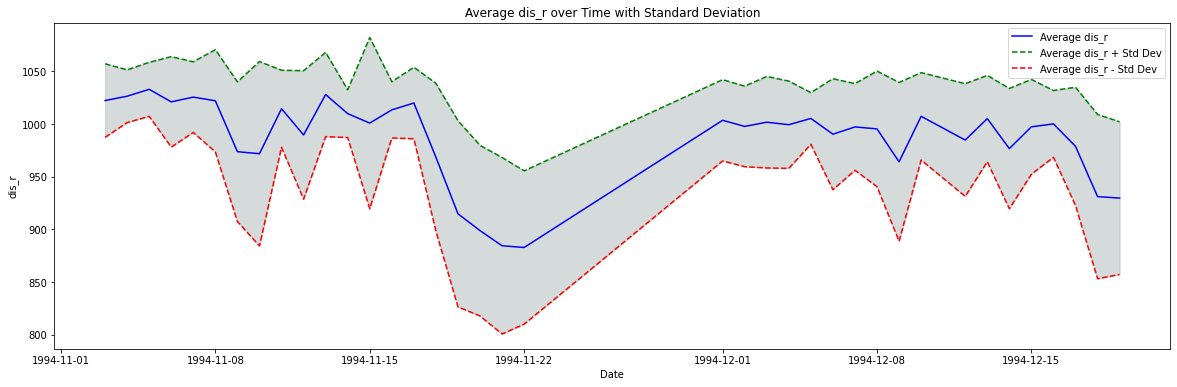

In [31]:
# Step 2: Plot average dis_r with standard deviation
plt.figure(figsize=(20, 6))
plt.plot(df2.loc[:37]['Date'], df2.loc[:37]['dis_r'], label='Average dis_r', color='blue')
plt.plot(df2.loc[:37]['Date'], df2.loc[:37]['dis_r'] + df2.loc[:37]['dis_r_std'], label='Average dis_r + Std Dev', linestyle='--', color='green')
plt.plot(df2.loc[:37]['Date'], df2.loc[:37]['dis_r'] - df2.loc[:37]['dis_r_std'], label='Average dis_r - Std Dev', linestyle='--', color='red')
plt.fill_between(df2.loc[:37]['Date'], df2.loc[:37]['dis_r'] + df2.loc[:37]['dis_r_std'], df2.loc[:37]['dis_r'] - df2.loc[:37]['dis_r_std'], color='darkslategray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('dis_r')
plt.title('Average dis_r over Time with Standard Deviation')
plt.legend()
plt.show()

## Right wing lengths of 1995

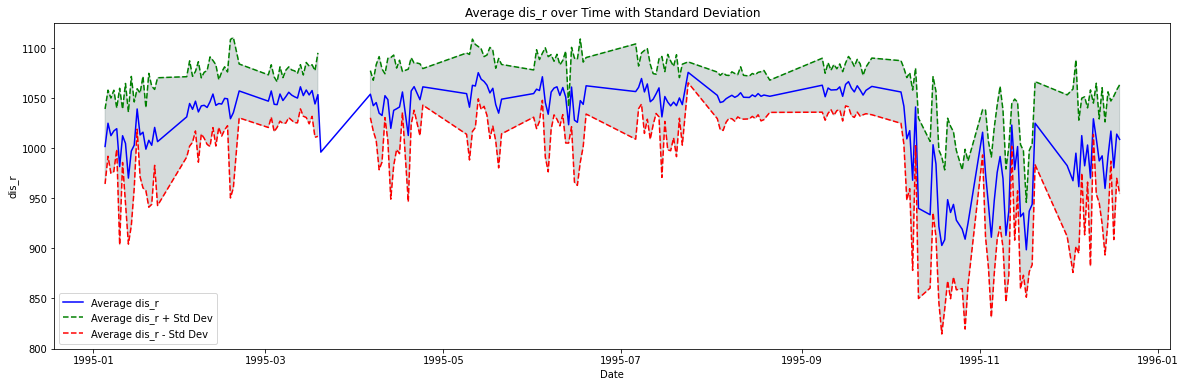

In [32]:
# Step 2: Plot average dis_r with standard deviation
plt.figure(figsize=(20, 6))
plt.plot(df2.loc[38:252]['Date'], df2.loc[38:252]['dis_r'], label='Average dis_r', color='blue')
plt.plot(df2.loc[38:252]['Date'], df2.loc[38:252]['dis_r'] + df2.loc[38:252]['dis_r_std'], label='Average dis_r + Std Dev', linestyle='--', color='green')
plt.plot(df2.loc[38:252]['Date'], df2.loc[38:252]['dis_r'] - df2.loc[38:252]['dis_r_std'], label='Average dis_r - Std Dev', linestyle='--', color='red')
plt.fill_between(df2.loc[38:252]['Date'], df2.loc[38:252]['dis_r'] + df2.loc[38:252]['dis_r_std'], df2.loc[38:252]['dis_r'] - df2.loc[38:252]['dis_r_std'], color='darkslategray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('dis_r')
plt.title('Average dis_r over Time with Standard Deviation')
plt.legend()
plt.show()

## Right wing lengths of 1996

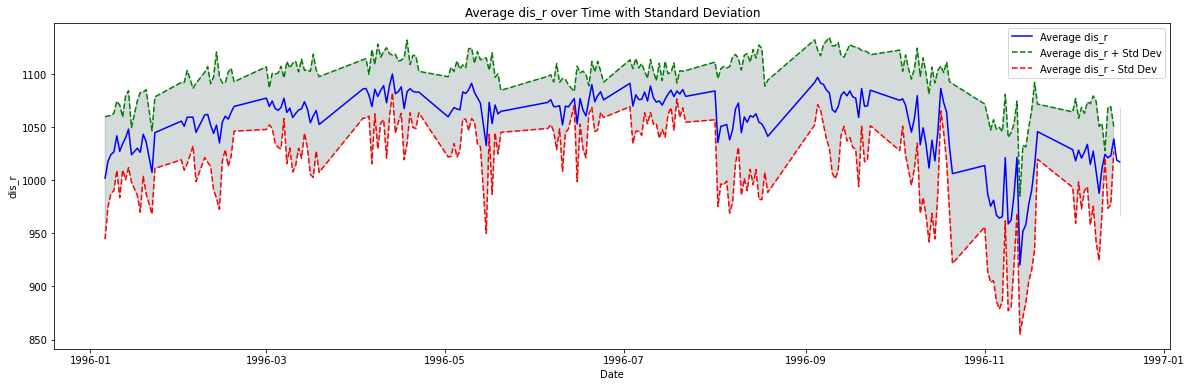

In [33]:
# Step 2: Plot average dis_r with standard deviation
plt.figure(figsize=(20, 6))
plt.plot(df2.loc[253:474]['Date'], df2.loc[253:474]['dis_r'], label='Average dis_r', color='blue')
plt.plot(df2.loc[253:474]['Date'], df2.loc[253:474]['dis_r'] + df2.loc[253:474]['dis_r_std'], label='Average dis_r + Std Dev', linestyle='--', color='green')
plt.plot(df2.loc[253:474]['Date'], df2.loc[253:474]['dis_r'] - df2.loc[253:474]['dis_r_std'], label='Average dis_r - Std Dev', linestyle='--', color='red')
plt.fill_between(df2.loc[253:474]['Date'], df2.loc[253:474]['dis_r'] + df2.loc[253:474]['dis_r_std'], df2.loc[253:474]['dis_r'] - df2.loc[253:474]['dis_r_std'], color='darkslategray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('dis_r')
plt.title('Average dis_r over Time with Standard Deviation')
plt.legend()
plt.show()

## Right wing lengths of 1997

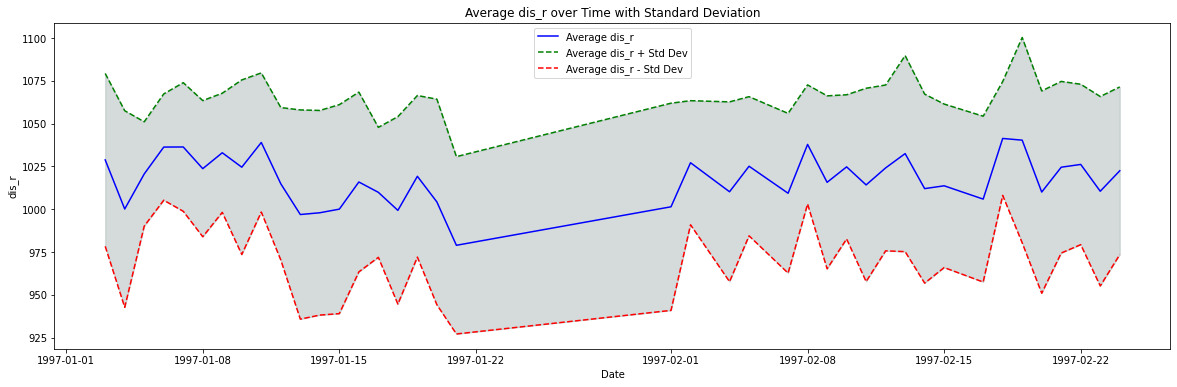

In [34]:
# Step 2: Plot average dis_r with standard deviation
plt.figure(figsize=(20, 6))
plt.plot(df2.loc[475:]['Date'], df2.loc[475:]['dis_r'], label='Average dis_r', color='blue')
plt.plot(df2.loc[475:]['Date'], df2.loc[475:]['dis_r'] + df2.loc[475:]['dis_r_std'], label='Average dis_r + Std Dev', linestyle='--', color='green')
plt.plot(df2.loc[475:]['Date'], df2.loc[475:]['dis_r'] - df2.loc[475:]['dis_r_std'], label='Average dis_r - Std Dev', linestyle='--', color='red')
plt.fill_between(df2.loc[475:]['Date'], df2.loc[475:]['dis_r'] + df2.loc[475:]['dis_r_std'], df2.loc[475:]['dis_r'] - df2.loc[475:]['dis_r_std'], color='darkslategray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('dis_r')
plt.title('Average dis_r over Time with Standard Deviation')
plt.legend()
plt.show()

## Right wing lengths from 1994-1997

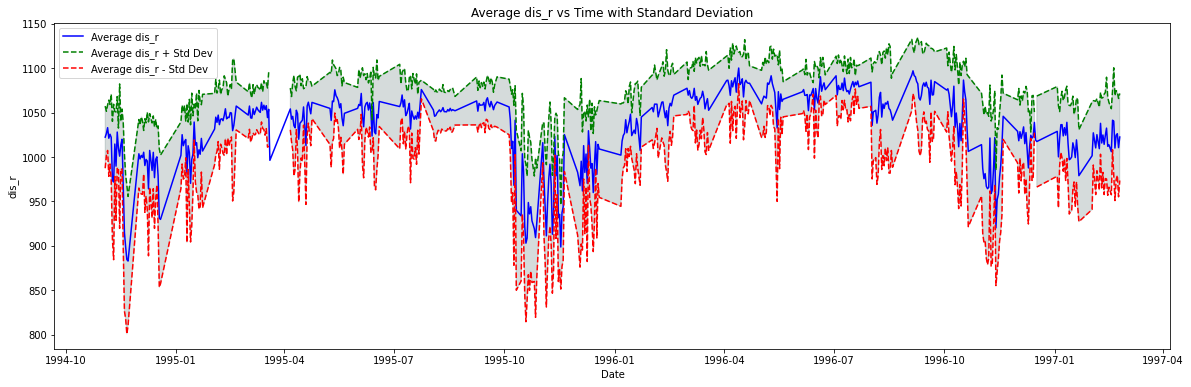

In [35]:
# Step 2: Plot average dis_r with standard deviation
plt.figure(figsize=(20, 6))
plt.plot(df2['Date'], df2['dis_r'], label='Average dis_r', color='blue')
plt.plot(df2['Date'], df2['dis_r'] + df2['dis_r_std'], label='Average dis_r + Std Dev', linestyle='--', color='green')
plt.plot(df2['Date'], df2['dis_r'] - df2['dis_r_std'], label='Average dis_r - Std Dev', linestyle='--', color='red')
plt.fill_between(df2['Date'], df2['dis_r'] + df2['dis_r_std'], df2['dis_r'] - df2['dis_r_std'], color='darkslategray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('dis_r')
plt.title('Average dis_r vs Time with Standard Deviation')
plt.legend()
plt.show()

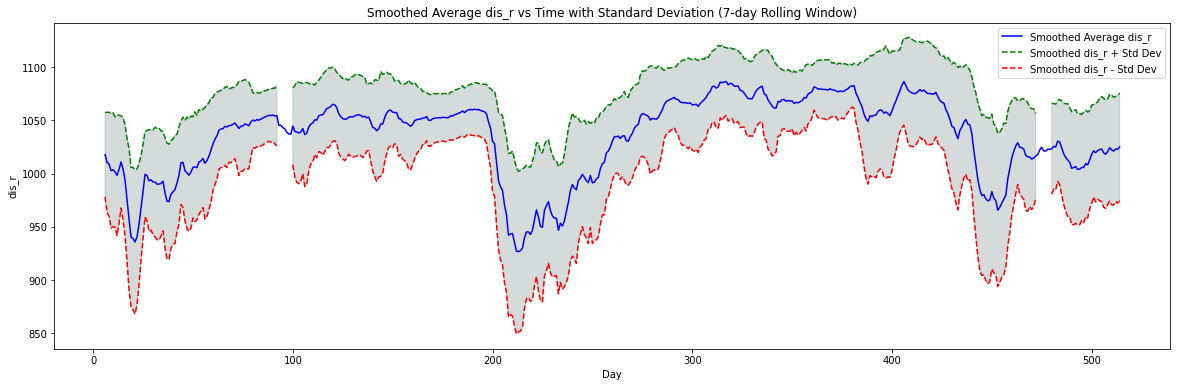

In [36]:
# Rolling window smoothing (e.g., 7-day moving average)
df2['dis_r_smooth'] = df2['dis_r'].rolling(window=7).mean()
df2['dis_r_std_smooth'] = df2['dis_r_std'].rolling(window=7).mean()

# Plot the smoothed data
plt.figure(figsize=(20, 6))
plt.plot(df2.index, df2['dis_r_smooth'], label='Smoothed Average dis_r', color='blue')
plt.plot(df2.index, df2['dis_r_smooth'] + df2['dis_r_std_smooth'], label='Smoothed dis_r + Std Dev', linestyle='--', color='green')
plt.plot(df2.index, df2['dis_r_smooth'] - df2['dis_r_std_smooth'], label='Smoothed dis_r - Std Dev', linestyle='--', color='red')
plt.fill_between(df2.index, df2['dis_r_smooth'] + df2['dis_r_std_smooth'], df2['dis_r_smooth'] - df2['dis_r_std_smooth'], color='darkslategray', alpha=0.2)
plt.xlabel('Day')
plt.ylabel('dis_r')
plt.title('Smoothed Average dis_r vs Time with Standard Deviation (7-day Rolling Window)')
plt.legend()
plt.show()


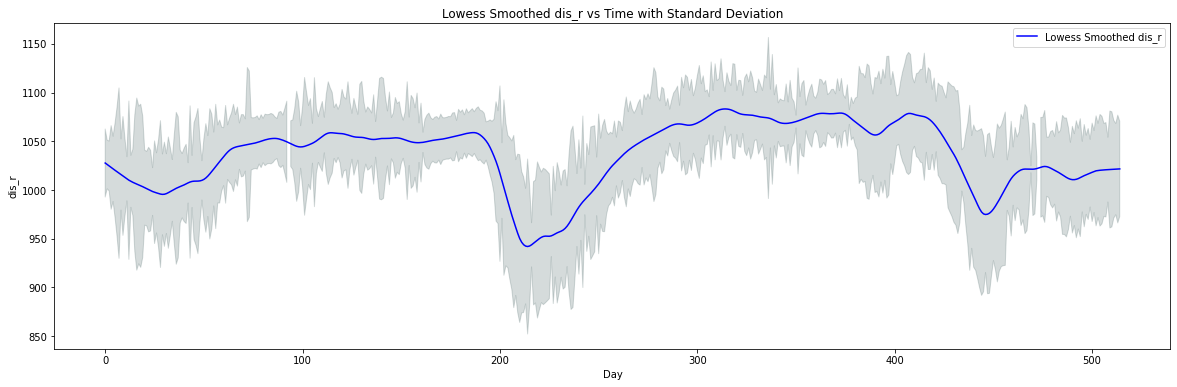

In [37]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Apply Lowess smoothing
lowess_smooth = lowess(df2['dis_r'], df2.index, frac=0.05)

# Plot the smoothed data
plt.figure(figsize=(20, 6))
plt.plot(df2.index, lowess_smooth[:, 1], label='Lowess Smoothed dis_r', color='blue')
plt.fill_between(df2.index, lowess_smooth[:, 1] + df2['dis_r_std'], lowess_smooth[:, 1] - df2['dis_r_std'], color='darkslategray', alpha=0.2)
plt.xlabel('Day')
plt.ylabel('dis_r')
plt.title('Lowess Smoothed dis_r vs Time with Standard Deviation')
plt.legend()
plt.show()


## Environmental Variables from 1994-1997

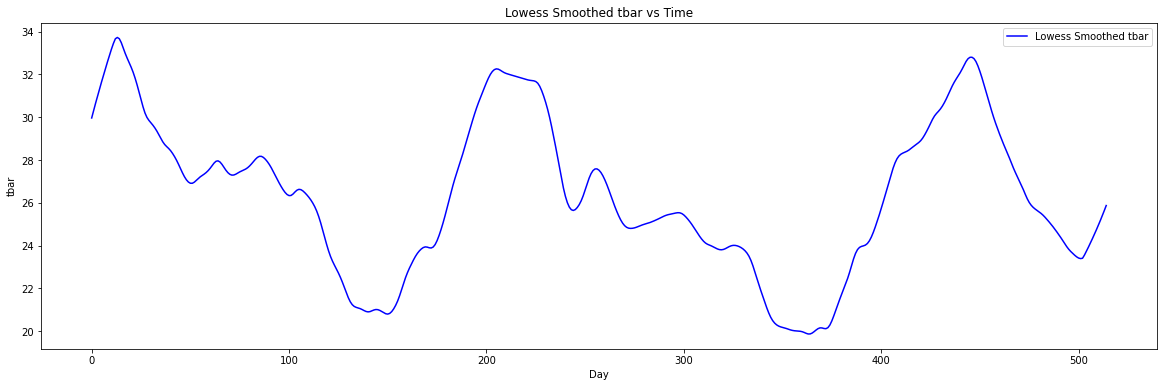

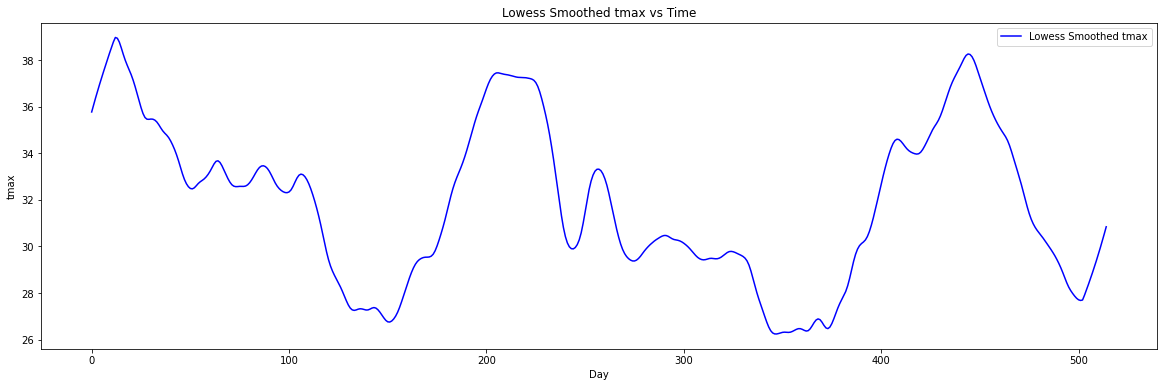

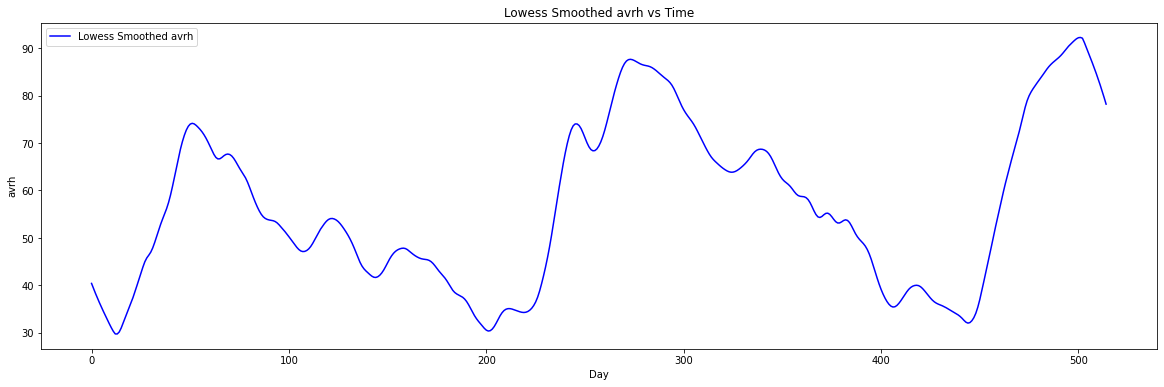

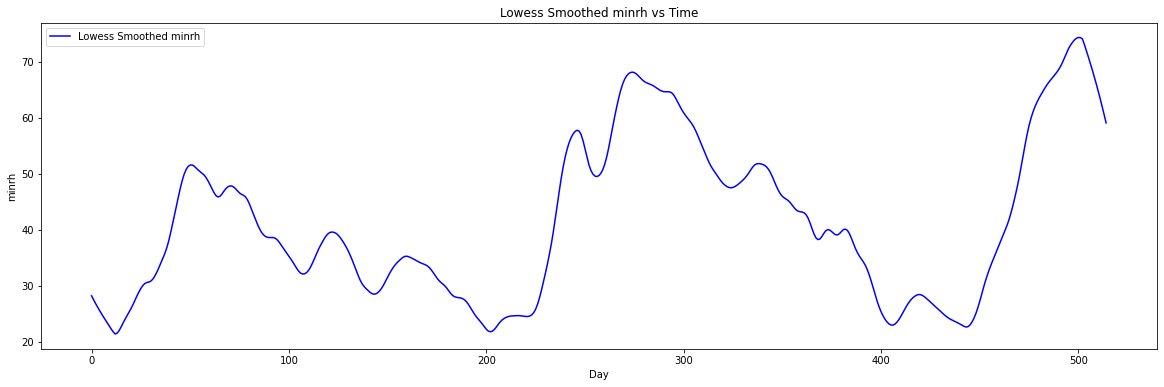

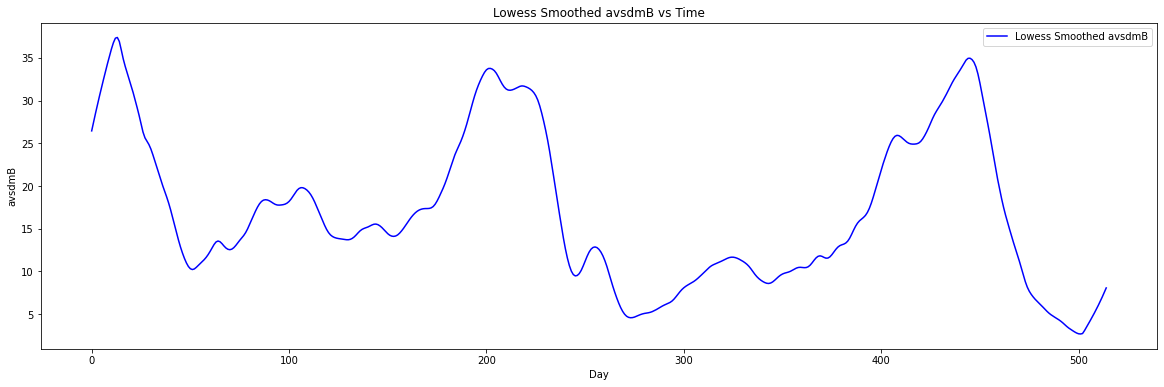

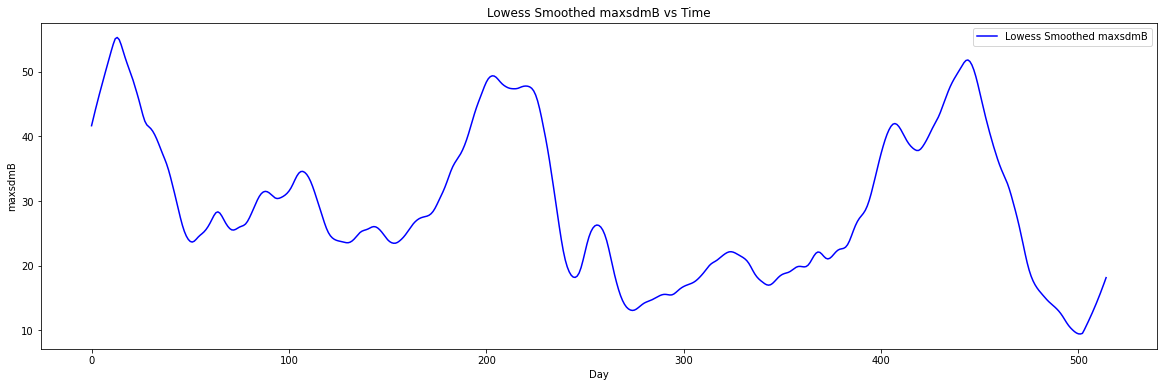

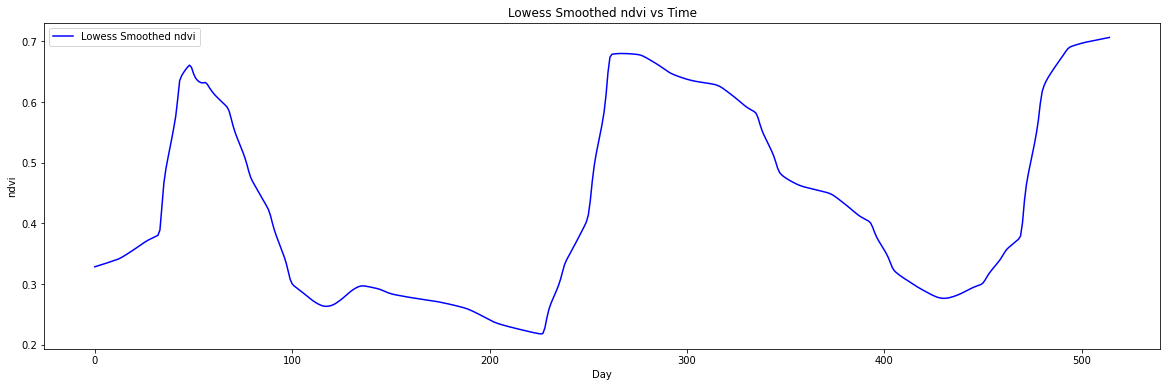

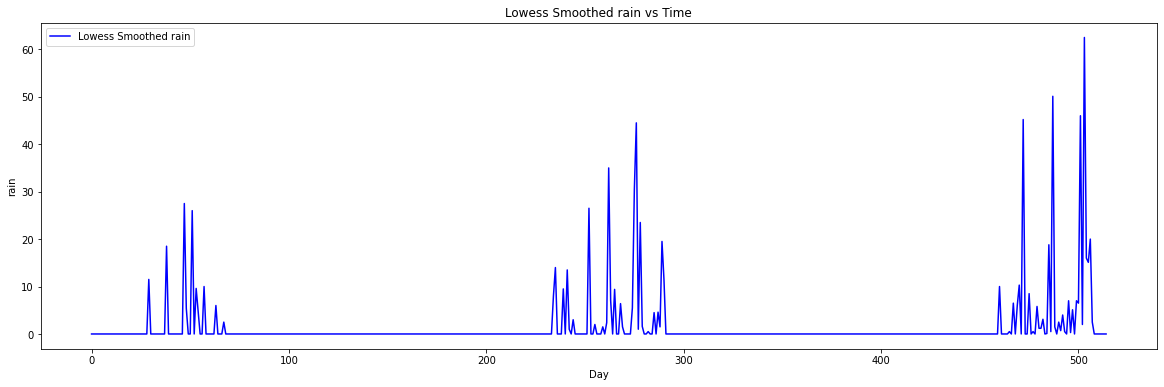

In [38]:
# Step 3: Plot each environmental variable against Date (8 separate plots)
env_variables = ['tbar', 'tmax', 'avrh', 'minrh', 'avsdmB', 'maxsdmB', 'ndvi', 'rain']

for var in env_variables:
    lowess_smooth_var = lowess(df2[var], df2.index, frac=0.05)  # Apply Lowess smoothing
    plt.figure(figsize=(20, 6))
    plt.plot(df2.index, lowess_smooth_var[:, 1], label=f'Lowess Smoothed {var}', color='blue')
    plt.xlabel('Day')
    plt.ylabel(var)
    plt.title(f'Lowess Smoothed {var} vs Time')
    plt.legend()
    plt.show()

In [39]:
# Step 4: Correlation Analysis between dis_r and environmental variables
correlation_results = {}
for var in env_variables:
    # Pearson correlation
    valid_mask = df2['dis_r'].notna() & df2[var].notna()
    corr, p_value = pearsonr(df2.loc[valid_mask, 'dis_r'], df2.loc[valid_mask, var])
    correlation_results[var] = (corr, p_value)

# Display the correlation results
print("Correlation results (dis_r vs environmental variables):")
for var, (corr, p_value) in correlation_results.items():
    print(f"{var}: Pearson correlation = {corr:.3f}, p-value = {p_value:.3f}")

Correlation results (dis_r vs environmental variables):
tbar: Pearson correlation = -0.607, p-value = 0.000
tmax: Pearson correlation = -0.542, p-value = 0.000
avrh: Pearson correlation = 0.205, p-value = 0.000
minrh: Pearson correlation = 0.182, p-value = 0.000
avsdmB: Pearson correlation = -0.450, p-value = 0.000
maxsdmB: Pearson correlation = -0.446, p-value = 0.000
ndvi: Pearson correlation = 0.222, p-value = 0.000
rain: Pearson correlation = -0.060, p-value = 0.173


In [40]:
# Step 5: Select the most explanatory variables
# Here we assume variables with highest absolute correlation and p-value < 0.05 are the most impactful

most_impactful_vars = [var for var, (corr, p_value) in correlation_results.items() if abs(corr) > 0.5 and p_value < 0.05]
most_impactful_vars

['tbar', 'tmax']

In [41]:
ordered_vars = ['tbar', 'tmax', 'avsdmB', 'maxsdmB', 'ndvi', 'avrh', 'minrh', 'rain']

In [42]:
#most_impactful_vars

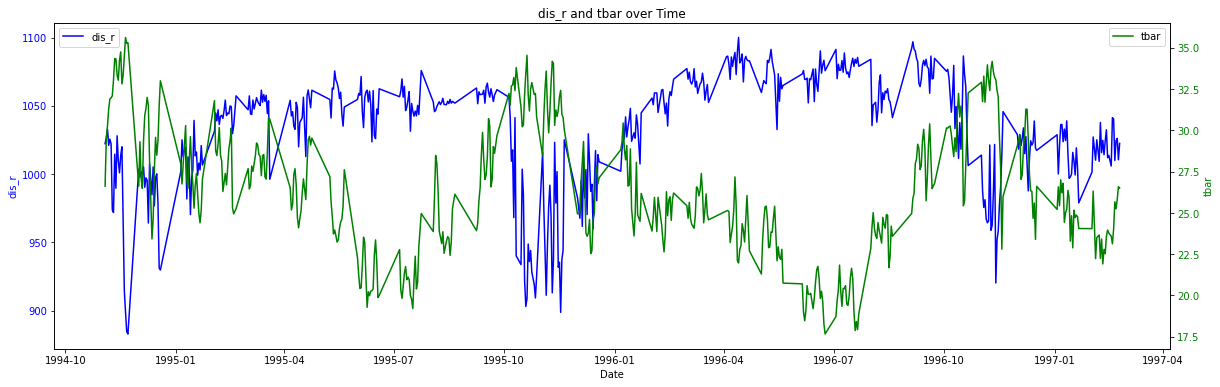

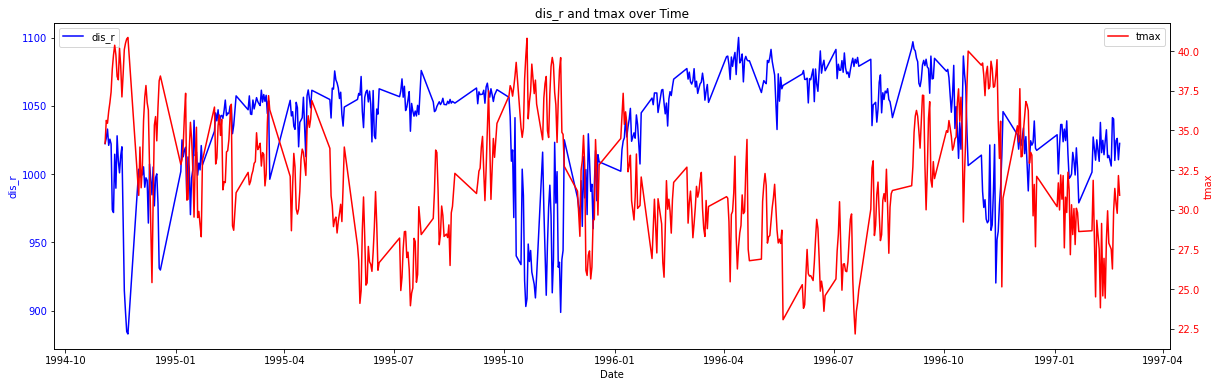

In [43]:
# Plot dis_r vs tbar
fig, ax1 = plt.subplots(figsize=(20, 6))
# Plot dis_r on the left y-axis
ax1.plot(df2['Date'], df2['dis_r'], label='dis_r', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('dis_r', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create the second y-axis for tbar
ax2 = ax1.twinx()
ax2.plot(df2['Date'], df2['tbar'], label='tbar', color='green')
ax2.set_ylabel('tbar', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# Title
plt.title('dis_r and tbar over Time')
# Display the plot
plt.show()

# Plot dis_r vs tmax
fig, ax1 = plt.subplots(figsize=(20, 6))
# Plot dis_r on the left y-axis
ax1.plot(df2['Date'], df2['dis_r'], label='dis_r', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('dis_r', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create the second y-axis for tmax
ax2 = ax1.twinx()
ax2.plot(df2['Date'], df2['tmax'], label='tmax', color='red')
ax2.set_ylabel('tmax', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# Title
plt.title('dis_r and tmax over Time')
# Display the plot
plt.show()

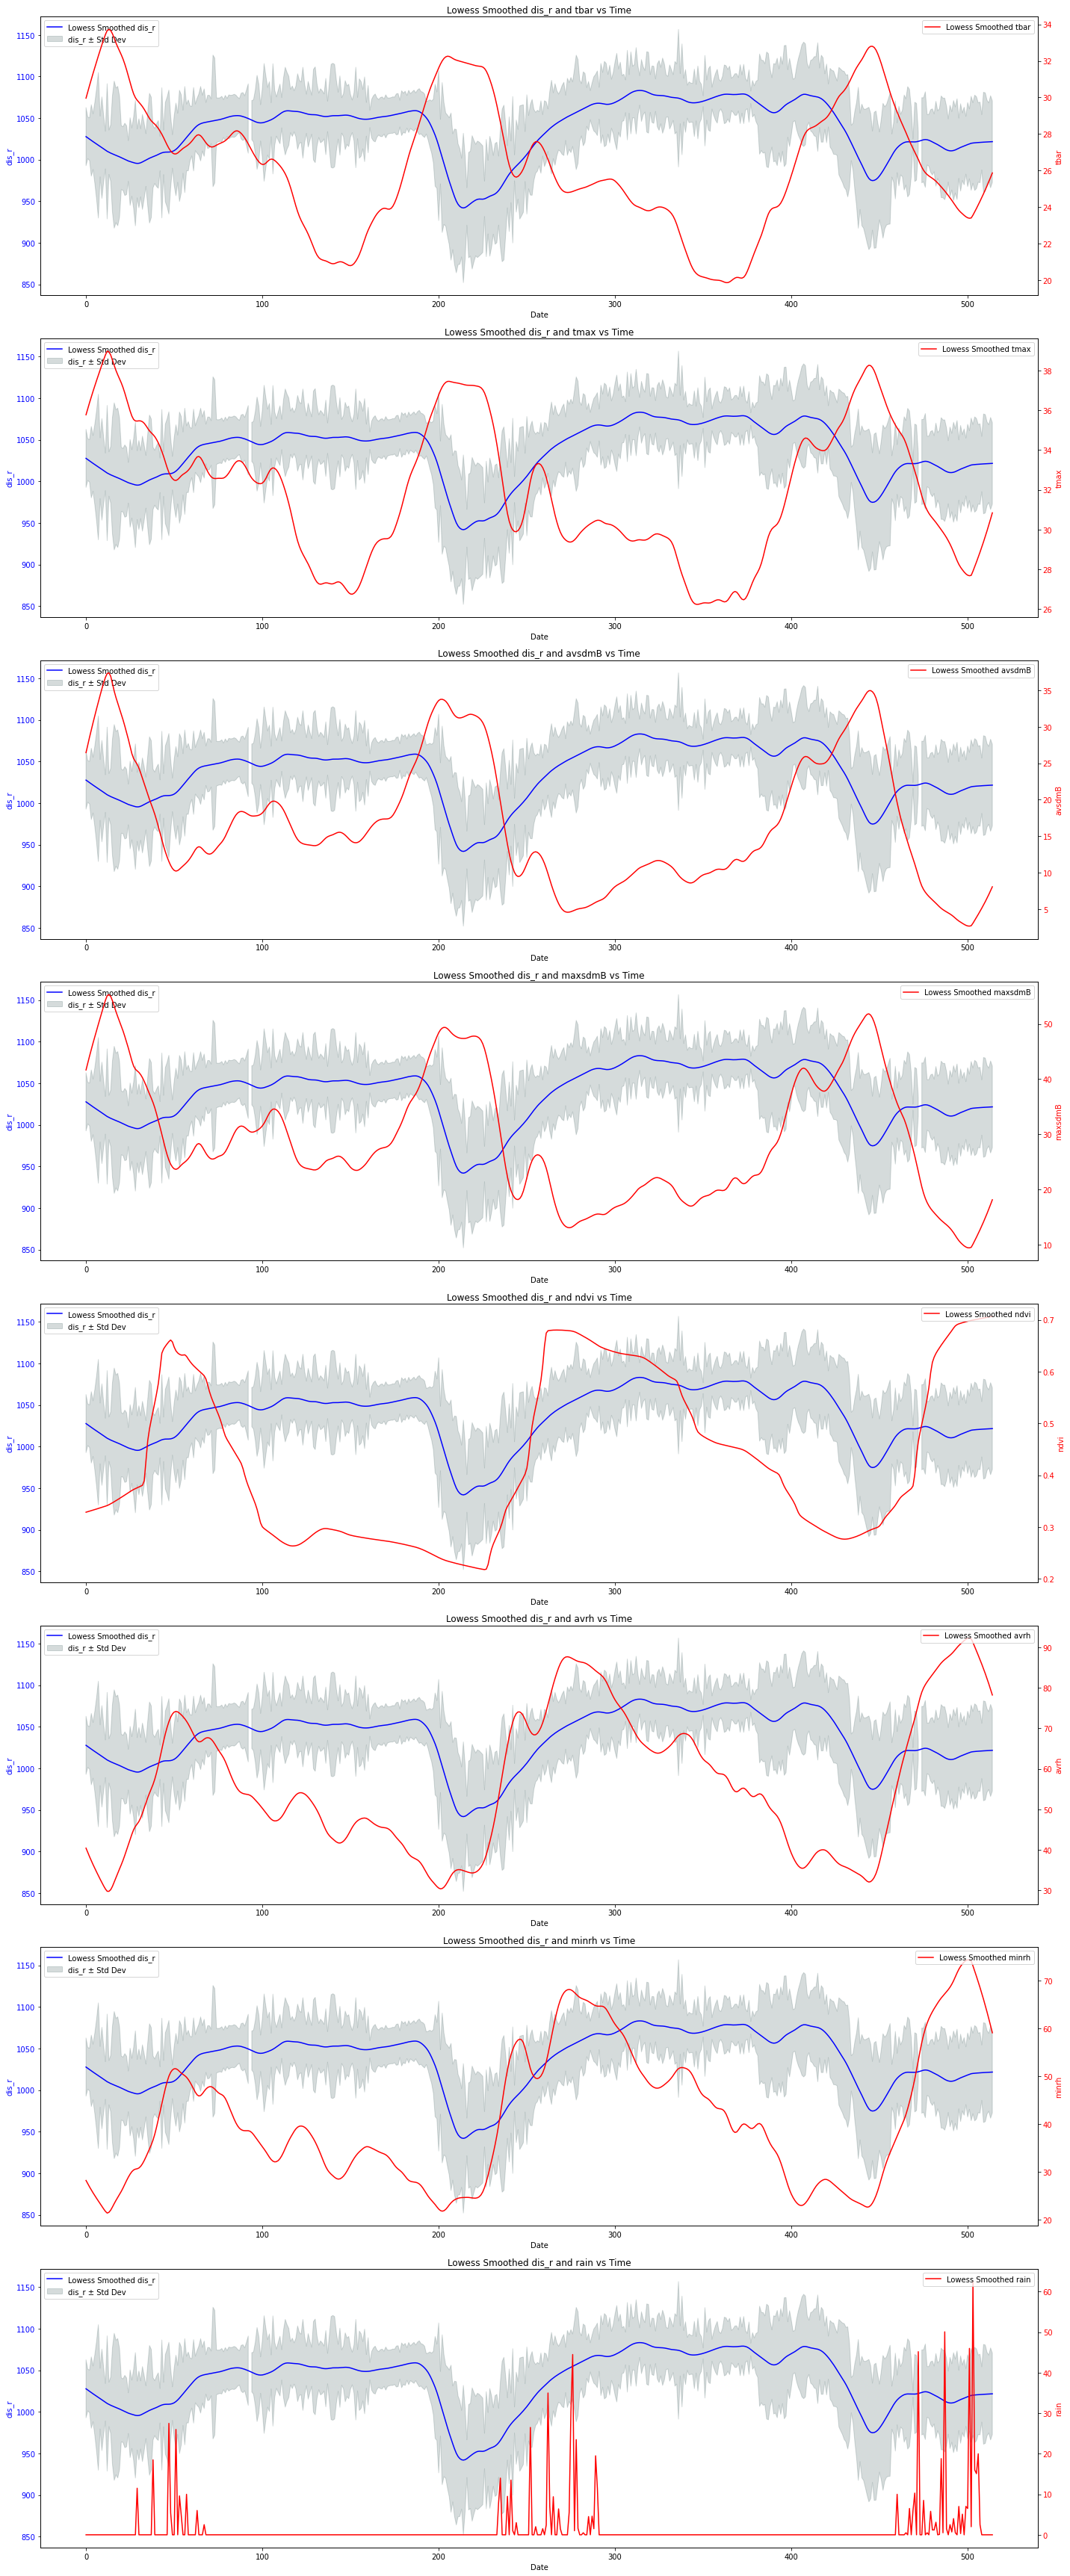

In [44]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt

# List of environmental variables in the desired order
ordered_vars = ['tbar', 'tmax', 'avsdmB', 'maxsdmB', 'ndvi', 'avrh', 'minrh', 'rain']

# Loop over the environmental variables to create 8 plots
fig, axes = plt.subplots(len(ordered_vars), 1, figsize=(20, 6 * len(ordered_vars)))  # Adjust height for 8 plots

for i, var in enumerate(ordered_vars):
    # Apply Lowess smoothing to dis_r and the current environmental variable
    lowess_smooth_dis_r = lowess(df2['dis_r'], df2.index, frac=0.05)
    lowess_smooth_var = lowess(df2[var], df2.index, frac=0.05)
    
    # Select the current axis
    ax1 = axes[i]
    
    # Plot dis_r on the left y-axis
    ax1.plot(df2.index, lowess_smooth_dis_r[:, 1], label='Lowess Smoothed dis_r', color='blue')
    ax1.fill_between(df2.index, 
                     lowess_smooth_dis_r[:, 1] + df2['dis_r_std'], 
                     lowess_smooth_dis_r[:, 1] - df2['dis_r_std'], 
                     color='darkslategray', alpha=0.2, label='dis_r ± Std Dev')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('dis_r', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create the second y-axis for the current environmental variable
    ax2 = ax1.twinx()
    ax2.plot(df2.index, lowess_smooth_var[:, 1], label=f'Lowess Smoothed {var}', color='red')
    ax2.set_ylabel(var, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # Title for the plot
    ax1.set_title(f'Lowess Smoothed dis_r and {var} vs Time')

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show all the plots
plt.show()
